
# Tasks 2 of EXIST 2024

By Maha Usmani and Rania Siddiqui  


# Imports and setup


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
! pip install -U accelerate
! pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 7.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import os
import shutil
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import accuracy_score

In [ ]:
import gdown
import pandas as pd

# URLs of the datasets
dev_url = 'https://drive.google.com/uc?id=1SnCAPwCLKqgBQ5MJ01hX1sBwXXz0UpUQ'
test_url = 'https://drive.google.com/uc?id=1v6C__BiKOnzPuiMKjD_QBpKSsRgETlxg'
train_url = 'https://drive.google.com/uc?id=1BBBNaXyzlQq0CsNQocmsNMT1c58mwhYj'

# Downloading the datasets
gdown.download(dev_url, 'dev.json', quiet=False)
gdown.download(test_url, 'test.json', quiet=False)
gdown.download(train_url, 'train.json', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1SnCAPwCLKqgBQ5MJ01hX1sBwXXz0UpUQ
To: /content/dev.json
100%|██████████| 1.42M/1.42M [00:00<00:00, 14.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1v6C__BiKOnzPuiMKjD_QBpKSsRgETlxg
To: /content/test.json
100%|██████████| 2.14M/2.14M [00:00<00:00, 18.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BBBNaXyzlQq0CsNQocmsNMT1c58mwhYj
To: /content/train.json
100%|██████████| 9.40M/9.40M [00:00<00:00, 41.8MB/s]


'train.json'

# Loading the Training Dataset


In [ ]:
train_df = pd.read_json('train.json',orient='index')
required_columns = ["id_EXIST", "lang", "tweet","labels_task1","labels_task2","labels_task3","split"]
train_df = train_df[required_columns]
train_df.head()

,id_EXIST,lang,tweet,labels_task1,labels_task2,labels_task3,split
100001,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...","[YES, YES, NO, YES, YES, YES]","[REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",TRAIN_ES
100002,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,"[NO, NO, NO, NO, YES, NO]","[-, -, -, -, DIRECT, -]","[[-], [-], [-], [-], [OBJECTIFICATION], [-]]",TRAIN_ES
100003,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES
100004,100004,es,@Lunariita7 Un retraso social bastante lamenta...,"[NO, NO, YES, NO, YES, YES]","[-, -, DIRECT, -, REPORTED, REPORTED]","[[-], [-], [IDEOLOGICAL-INEQUALITY], [-], [IDE...",TRAIN_ES
100005,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,"[YES, NO, YES, NO, YES, YES]","[REPORTED, -, JUDGEMENTAL, -, JUDGEMENTAL, DIR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [-...",TRAIN_ES


# Loading the Validation Dataset

In [ ]:
df_val = pd.read_json('/content/dev.json',orient='index')
df_val = df_val[required_columns]
df_val.head()

,id_EXIST,lang,tweet,labels_task1,labels_task2,labels_task3,split
300001,300001,es,@Fichinescu La comunidad gamer es un antro de ...,"[NO, YES, YES, NO, YES, NO]","[-, JUDGEMENTAL, JUDGEMENTAL, -, REPORTED, -]","[[-], [MISOGYNY-NON-SEXUAL-VIOLENCE], [MISOGYN...",DEV_ES
300002,300002,es,@anacaotica88 @MordorLivin No me acuerdo de lo...,"[YES, YES, NO, YES, YES, YES]","[JUDGEMENTAL, REPORTED, -, JUDGEMENTAL, JUDGEM...","[[IDEOLOGICAL-INEQUALITY, STEREOTYPING-DOMINAN...",DEV_ES
300003,300003,es,@cosmicJunkBot lo digo cada pocos dias y lo re...,"[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",DEV_ES
300004,300004,es,Also mientras les decia eso la señalaba y deci...,"[NO, YES, YES, YES, YES, YES]","[-, REPORTED, REPORTED, REPORTED, JUDGEMENTAL,...","[[-], [SEXUAL-VIOLENCE], [SEXUAL-VIOLENCE], [S...",DEV_ES
300005,300005,es,"And all people killed, attacked, harassed by ...","[NO, YES, NO, NO, NO, NO]","[-, DIRECT, -, -, -, -]","[[-], [STEREOTYPING-DOMINANCE], [-], [-], [-],...",DEV_ES


# Loading Test Dataset


In [ ]:
df_test = pd.read_json('/content/test.json',orient='index')
df_test.head()

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,ethnicities_annotators,study_levels_annotators,countries_annotators,split
500001,500001,es,@Eurogamer_es Todo gamergate desde el desarrol...,6,"[Annotator_810, Annotator_811, Annotator_812, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[Hispano or Latino, White or Caucasian, White ...","[High school degree or equivalent, Master’s de...","[Mexico, Spain, Italy, United States, Portugal...",TEST_ES
500002,500002,es,"@ArCaNgEl__23 @Benzenazi Hombre, no es compara...",6,"[Annotator_780, Annotator_816, Annotator_817, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[Hispano or Latino, Hispano or Latino, Black o...","[High school degree or equivalent, Bachelor’s ...","[Chile, Mexico, United States, Mexico, Mexico,...",TEST_ES
500003,500003,es,yo buscando las empresas metidas en el gamerga...,6,"[Annotator_821, Annotator_822, Annotator_823, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[Hispano or Latino, Hispano or Latino, Asian, ...","[Bachelor’s degree, Bachelor’s degree, Master’...","[Mexico, Mexico, VietNam, United States, Mexic...",TEST_ES
500004,500004,es,"@jordirico Primero fue internet, luego el game...",6,"[Annotator_827, Annotator_828, Annotator_829, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[Hispano or Latino, White or Caucasian, Hispan...","[High school degree or equivalent, Bachelor’s ...","[Chile, Spain, Mexico, United Kingdom, Chile, ...",TEST_ES
500005,500005,es,@AlonsoQuijano12 Yo estuve metido en el gamerg...,6,"[Annotator_827, Annotator_828, Annotator_829, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[Hispano or Latino, White or Caucasian, Hispan...","[High school degree or equivalent, Bachelor’s ...","[Chile, Spain, Mexico, United Kingdom, Chile, ...",TEST_ES


# Preproccessing the Dataset


In [ ]:
def assign_majority_label(labels, num_annotators):
    if num_annotators == 1:labels = np.concatenate(labels)
    else:labels = np.array(labels).flatten()
    counts = pd.Series(labels).value_counts()
    filtered_counts = counts[counts > num_annotators]
    if len(filtered_counts.index) == 1:
        return filtered_counts.index[0]
    elif len(filtered_counts.index) > 1:
        return filtered_counts.index.tolist()
    else:
        return None

In [ ]:
def transform2(x):
    if x == "DIRECT":return 1
    elif x == "REPORTED":return 2
    elif x == "JUDGEMENTAL":return 3
    else:return 0

def softmax(label_counts):
    labels = list(label_counts.values())
    probabilities = np.exp(labels)/np.sum(np.exp(labels))
    return probabilities

labels2 = ["NO","DIRECT","REPORTED","JUDGEMENTAL"]
def calculate_soft_labels_2(label):
    d = {label:0 for label in labels2}
    for i in label:
        if i=='-' or i=="UNKNOWN":i = "NO"
        d[i] = d.get(i, 0) + 1
    return softmax(d)

In [ ]:
train_df["soft_label2"] = train_df["labels_task2"].apply(calculate_soft_labels_2)
train_df["hard_label2"] = train_df["labels_task2"].apply(lambda x: assign_majority_label(x, 2))
train_df["hard_label2"] = train_df["hard_label2"].apply(transform2)

df_val["soft_label2"] = df_val["labels_task2"].apply(calculate_soft_labels_2)
df_val["hard_label2"] = df_val["labels_task2"].apply(lambda x: assign_majority_label(x, 2))
df_val["hard_label2"] = df_val["hard_label2"].apply(transform2)

train_dataset_soft2 = train_df[["tweet", "soft_label2"]]
train_dataset_hard2 = train_df[["tweet", "hard_label2"]]

val_dataset_soft2 = df_val[["tweet", "soft_label2"]]
val_dataset_hard2 = df_val[["tweet", "hard_label2"]]

test_dataset2 = df_test[["tweet"]]

# Task 2

### Model loading

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
model_chkpt = "/content/drive/MyDrive/EXIST/checkpoints_task1/bert/checkpoint-865"
model_name = "bert-base-multilingual-uncased"
model = BertForSequenceClassification.from_pretrained(model_name, num_labels = 4)
tokenizer = BertTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
Yo

### Tokenization

In [ ]:
from datasets import Dataset

In [ ]:
def tokenize_function(example):
    return tokenizer(
        example["tweet"],
        max_length=512,
        padding="max_length",
        truncation=True,
        return_tensors="pt",
    )

In [ ]:
tokenized_train = Dataset.from_pandas(train_dataset_soft2).map(tokenize_function, batched=True)
tokenized_validation = Dataset.from_pandas(val_dataset_soft2).map(tokenize_function, batched=True)
tokenized_test = Dataset.from_pandas(test_dataset2).map(tokenize_function, batched=True)

Map:   0%|          | 0/6920 [00:00<?, ? examples/s]

Map:   0%|          | 0/1038 [00:00<?, ? examples/s]

Map:   0%|          | 0/2076 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets = tokenized_train.rename_column("soft_label2", "labels")
tokenized_datasets_train = tokenized_datasets.remove_columns(["tweet", "__index_level_0__"])
tokenized_datasets_train.set_format("torch")


tokenized_datasets = tokenized_validation.rename_column("soft_label2", "labels")
tokenized_datasets_val = tokenized_datasets.remove_columns(["tweet"])
tokenized_datasets_val.set_format("torch")

tokenized_datasets_test = tokenized_test.remove_columns(["tweet"])
tokenized_datasets_test.set_format("torch")

### Training the dataset

In [ ]:
!mkdir "/content/checkpoints2"
!mkdir "/content/checkpoints2/bert"
!mkdir "/content/checkpoints2/xlm"

!mkdir "/content/outputs2"
!mkdir "/content/outputs2/bert"
!mkdir "/content/outputs2/xlm"
!mkdir "/content/outputs2/ensamble"

In [ ]:
epochs = 5

In [ ]:
from transformers import Trainer
import torch
torch.cuda.empty_cache()

training_args = TrainingArguments(
    output_dir="/content/checkpoints2/bert",
    num_train_epochs=epochs,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-05,
    weight_decay=0.004891290652279793,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch"
)


torch.cuda.empty_cache()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets_train,
    eval_dataset= tokenized_datasets_val
)



In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.417700,0.412038
2,0.358500,0.395865
3,0.322700,0.411253
4,0.294900,0.414869
5,0.278600,0.410532


TrainOutput(global_step=4325, training_loss=0.3344982945436687, metrics={'train_runtime': 3560.2128, 'train_samples_per_second': 9.719, 'train_steps_per_second': 1.215, 'total_flos': 9103805991321600.0, 'train_loss': 0.3344982945436687, 'epoch': 5.0})

### Predictions for BERT


In [ ]:
tokenized_datasets_val

Dataset({
    features: ['labels', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1038
})

In [ ]:
predictions_val, labels, metrics = trainer.predict(tokenized_datasets_val, metric_key_prefix="predict")
predictions_soft_bert_val = torch.nn.functional.softmax(torch.tensor(predictions_val), dim=1)
predictions_hard_bert_val = []
for i in predictions_soft_bert_val:
    predictions_hard_bert_val.append(labels2[torch.argmax(i)])

In [ ]:
predictions_test, labels, metrics = trainer.predict(tokenized_datasets_test, metric_key_prefix="predict")
predictions_soft_bert_test = torch.nn.functional.softmax(torch.tensor(predictions_test), dim=1)
predictions_hard_bert_test = []
for i in predictions_soft_bert_test:
    predictions_hard_bert_test.append(labels2[torch.argmax(i)])

In [ ]:
predictions_train, labels, metrics = trainer.predict(tokenized_datasets_train, metric_key_prefix="predict")
predictions_soft_bert_train = torch.nn.functional.softmax(torch.tensor(predictions_train), dim=1)
predictions_hard_bert_train = []
for i in predictions_soft_bert_train:
    predictions_hard_bert_train.append(labels2[torch.argmax(i)])

In [ ]:
import json
json_data = []

for i in range(len(tokenized_datasets_test['input_ids'])):
    json_object = {
        "id": tokenized_datasets_test['__index_level_0__'][i].item(),
        "value": {
            "NO":predictions_soft_bert_test[i][0].item(),
            "DIRECT": predictions_soft_bert_test[i][1].item(),
            "REPORTED":predictions_soft_bert_test[i][2].item(),
            "JUDGEMENTAL": predictions_soft_bert_test[i][3].item(),
        },
         "test_case":"EXIST2024"
    }
    json_data.append(json_object)

with open('/content/outputs2/bert/soft.json', 'w') as f:
    json.dump(json_data, f, indent=4)


In [ ]:
predictions_hard_bert_test

In [ ]:
json_data = []
print()
for i in range(len(tokenized_datasets_test['input_ids'])):
    json_object = {
        "id": tokenized_datasets_test['__index_level_0__'][i].item(),
        "value":  predictions_hard_bert_test[i],
         "test_case":"EXIST2024"
    }
    json_data.append(json_object)

with open('/content/outputs2/bert/hard.json', 'w') as f:
    json.dump(json_data, f, indent=4)


### Plotting

In [ ]:
training_loss = [i["loss"] for i in trainer.state.log_history[:-1:2]]
val_loss = [i["eval_loss"] for i in trainer.state.log_history[1::2]]

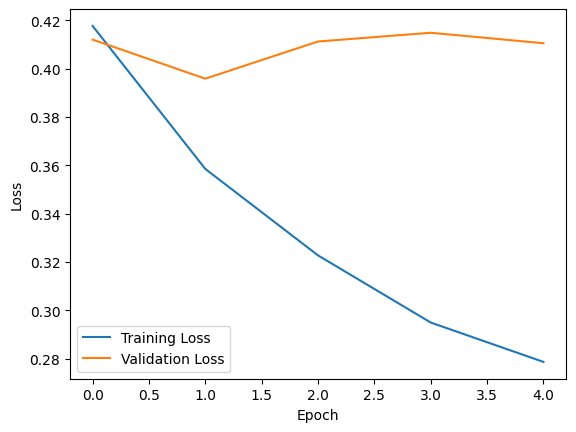

In [ ]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(epochs)], training_loss, label='Training Loss')
plt.plot([i for i in range(epochs)], val_loss, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


### TESTING AGAINST BASELINES FOR DEV

In [ ]:
predictions_hard_bert_labels = []
for x in predictions_hard_bert_val:
  if x == "DIRECT":predictions_hard_bert_labels.append(1)
  elif x == "REPORTED":predictions_hard_bert_labels.append(2)
  elif x == "JUDGEMENTAL":predictions_hard_bert_labels.append(3)
  else:predictions_hard_bert_labels.append(0)

In [ ]:
print(df_test.shape)
print(df_val.shape)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
labels = val_dataset_hard2["hard_label2"]
n = len(labels)
baseline_maj = [0 for i in range(n)]
baseline_min = [1 for i in range(n)]


f1 = f1_score(labels, baseline_maj,average = 'weighted')
accuracy = accuracy_score(labels, baseline_maj)
print("F1 Score of Basleine 1:", f1)
print("Accuracy of Baseline 1:", accuracy)

f1 = f1_score(labels, baseline_min, average = 'weighted')
accuracy = accuracy_score(labels, baseline_min)
print("F1 Score of Basleine 2:", f1)
print("Accuracy of Baseline 2:", accuracy)

f1 = f1_score(labels, predictions_hard_bert_labels, average = 'weighted')
accuracy = accuracy_score(labels, predictions_hard_bert_labels)
print("F1 Score of our model:", f1)
print("Accuracy of our model:", accuracy)

F1 Score of Basleine 1: 0.5247210750617566
Accuracy of Baseline 1: 0.6599229287090559
F1 Score of Basleine 2: 0.06282803118308163
Accuracy of Baseline 2: 0.1936416184971098
F1 Score of our model: 0.6867529126038385
Accuracy of our model: 0.6801541425818882


### **Testing Baselines for train**

In [ ]:
predictions_hard_bert_labels_train = []
for x in predictions_hard_bert_train:
  if x == "DIRECT":predictions_hard_bert_labels_train.append(1)
  elif x == "REPORTED":predictions_hard_bert_labels_train.append(2)
  elif x == "JUDGEMENTAL":predictions_hard_bert_labels_train.append(3)
  else:predictions_hard_bert_labels_train.append(0)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
labels = train_dataset_hard2["hard_label2"]
n = len(labels)
baseline_maj = [0 for i in range(n)]
baseline_min = [1 for i in range(n)]


f1 = f1_score(labels, baseline_maj, average = 'weighted')
accuracy = accuracy_score(labels, baseline_maj)
print("F1 Score of Basleine 1:", f1)
print("Accuracy of Baseline 1:", accuracy)

f1 = f1_score(labels, baseline_min, average = 'weighted')
accuracy = accuracy_score(labels, baseline_min)
print("F1 Score of Basleine 2:", f1)
print("Accuracy of Baseline 2:", accuracy)

f1 = f1_score(labels, predictions_hard_bert_labels_train, average='weighted')
accuracy = accuracy_score(labels, predictions_hard_bert_labels_train)
print("F1 Score of our model:", f1)
print("Accuracy of our model:", accuracy)

F1 Score of Basleine 1: 0.5770376987470103
Accuracy of Baseline 1: 0.7004335260115607
F1 Score of Basleine 2: 0.0570831828034682
Accuracy of Baseline 2: 0.1838150289017341
F1 Score of our model: 0.8677466358463114
Accuracy of our model: 0.8570809248554914


## XLM

### Model Loading

In [ ]:
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification
model_name = "xlm-roberta-base"

model = XLMRobertaForSequenceClassification.from_pretrained(model_name, num_labels=4)
tokenizer = XLMRobertaTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Tokenization

In [ ]:
from datasets import Dataset

In [ ]:
def tokenize_function(example):
    return tokenizer(
        example["tweet"],
        max_length=512,
        padding="max_length",
        truncation=True,
        return_tensors="pt",
    )

In [ ]:
tokenized_train = Dataset.from_pandas(train_dataset_soft2).map(tokenize_function, batched=True)
tokenized_validation = Dataset.from_pandas(val_dataset_soft2).map(tokenize_function, batched=True)
test_validation = Dataset.from_pandas(test_dataset2).map(tokenize_function, batched=True)

Map:   0%|          | 0/6920 [00:00<?, ? examples/s]

Map:   0%|          | 0/1038 [00:00<?, ? examples/s]

Map:   0%|          | 0/2076 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets = tokenized_train.rename_column("soft_label2", "labels")
tokenized_datasets_train = tokenized_datasets.remove_columns(["tweet", "__index_level_0__"])
tokenized_datasets_train.set_format("torch")


tokenized_datasets = tokenized_validation.rename_column("soft_label2", "labels")
tokenized_datasets_val = tokenized_datasets.remove_columns(["tweet"])
tokenized_datasets_val.set_format("torch")

tokenized_datasets_test = tokenized_test.remove_columns(["tweet"])
tokenized_datasets_test.set_format("torch")

### Training The dataset

In [ ]:
from transformers import Trainer
import torch
torch.cuda.empty_cache()

training_args = TrainingArguments(
    output_dir="/content/checkpoints2/xlm",
    num_train_epochs=epochs,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-05,
    weight_decay=0.004891290652279793,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch"
)


torch.cuda.empty_cache()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets_train,
    eval_dataset= tokenized_datasets_val
)


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.419100,0.415892
2,0.363800,0.384620
3,0.331700,0.404204
4,0.308000,0.399964
5,0.291700,0.403901


TrainOutput(global_step=4325, training_loss=0.3428601709266618, metrics={'train_runtime': 3813.7168, 'train_samples_per_second': 9.073, 'train_steps_per_second': 1.134, 'total_flos': 9103805991321600.0, 'train_loss': 0.3428601709266618, 'epoch': 5.0})

### Plotting

In [ ]:
training_loss = [i["loss"] for i in trainer.state.log_history[:-1:2]]
val_loss = [i["eval_loss"] for i in trainer.state.log_history[1::2]]

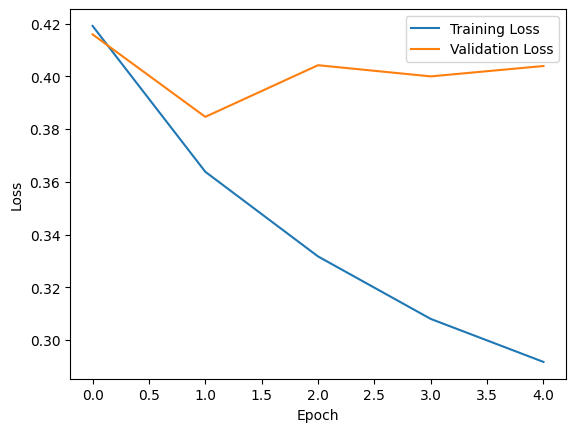

In [ ]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(epochs)], training_loss, label='Training Loss')
plt.plot([i for i in range(epochs)], val_loss, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Predictions

In [ ]:
predictions_val, labels, metrics = trainer.predict(tokenized_datasets_val, metric_key_prefix="predict")
predictions_soft_xlm_val = torch.nn.functional.softmax(torch.tensor(predictions_val), dim=1)
predictions_hard_xlm_val = []
for i in predictions_soft_xlm_val:
    predictions_hard_xlm_val.append(labels2[torch.argmax(i)])

In [ ]:
predictions_test, labels, metrics = trainer.predict(tokenized_datasets_test, metric_key_prefix="predict")
predictions_soft_xlm_test = torch.nn.functional.softmax(torch.tensor(predictions_test), dim=1)
predictions_hard_xlm_test = []
for i in predictions_soft_xlm_test:
    predictions_hard_xlm_test.append(labels2[torch.argmax(i)])

In [ ]:
predictions_train, labels, metrics = trainer.predict(tokenized_datasets_train, metric_key_prefix="predict")
predictions_soft_xml_train = torch.nn.functional.softmax(torch.tensor(predictions_train), dim=1)
predictions_hard_xml_train = []
for i in predictions_soft_xml_train:
    predictions_hard_xml_train.append(labels2[torch.argmax(i)])

### Output

In [ ]:
import json
json_data = []

for i in range(len(tokenized_datasets_test['input_ids'])):
    json_object = {
        "id": tokenized_datasets_test['__index_level_0__'][i].item(),
        "value": {
            "NO":predictions_soft_xlm_test[i][0].item(),
            "DIRECT": predictions_soft_xlm_test[i][1].item(),
            "REPORTED":predictions_soft_xlm_test[i][2].item(),
            "JUDGEMENTAL": predictions_soft_xlm_test[i][3].item(),
        },
         "test_case":"EXIST2024"
    }
    json_data.append(json_object)

with open('/content/outputs2/xlm/soft.json', 'w') as f:
    json.dump(json_data, f, indent=4)


In [ ]:
json_data = []

for i in range(len(tokenized_datasets_test['input_ids'])):
    json_object = {
        "id": tokenized_datasets_test['__index_level_0__'][i].item(),
        "value":  predictions_hard_xlm_test[i],
         "test_case":"EXIST2024"
    }
    json_data.append(json_object)

with open('/content/outputs2/xlm/hard.json', 'w') as f:
    json.dump(json_data, f, indent=4)


### Testing Against Baselines

In [ ]:
predictions_hard_xlm_labels = []
for x in predictions_hard_xlm_val:
  if x == "DIRECT":predictions_hard_xlm_labels.append(1)
  elif x == "REPORTED":predictions_hard_xlm_labels.append(2)
  elif x == "JUDGEMENTAL":predictions_hard_xlm_labels.append(3)
  else:predictions_hard_xlm_labels.append(0)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
labels = val_dataset_hard2["hard_label2"]
n = len(labels)
baseline_maj = [0 for i in range(n)]
baseline_min = [1 for i in range(n)]


f1 = f1_score(labels, baseline_maj,average = 'weighted')
accuracy = accuracy_score(labels, baseline_maj)
print("F1 Score of Basleine 1:", f1)
print("Accuracy of Baseline 1:", accuracy)

f1 = f1_score(labels, baseline_min, average = 'weighted')
accuracy = accuracy_score(labels, baseline_min)
print("F1 Score of Basleine 2:", f1)
print("Accuracy of Baseline 2:", accuracy)

f1 = f1_score(labels, predictions_hard_xlm_labels, average = 'weighted')
accuracy = accuracy_score(labels, predictions_hard_xlm_labels)
print("F1 Score of our model:", f1)
print("Accuracy of our model:", accuracy)

F1 Score of Basleine 1: 0.5247210750617566
Accuracy of Baseline 1: 0.6599229287090559
F1 Score of Basleine 2: 0.06282803118308163
Accuracy of Baseline 2: 0.1936416184971098
F1 Score of our model: 0.6964482755916946
Accuracy of our model: 0.6917148362235067


In [ ]:
predictions_hard_xml_labels_train = []
for x in predictions_hard_xml_train:
  if x == "DIRECT":predictions_hard_xml_labels_train.append(1)
  elif x == "REPORTED":predictions_hard_xml_labels_train.append(2)
  elif x == "JUDGEMENTAL":predictions_hard_xml_labels_train.append(3)
  else:predictions_hard_xml_labels_train.append(0)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
labels = train_dataset_hard2["hard_label2"]
n = len(labels)
baseline_maj = [0 for i in range(n)]
baseline_min = [1 for i in range(n)]


f1 = f1_score(labels, baseline_maj,average = 'weighted')
accuracy = accuracy_score(labels, baseline_maj)
print("F1 Score of Basleine 1:", f1)
print("Accuracy of Baseline 1:", accuracy)

f1 = f1_score(labels, baseline_min, average = 'weighted')
accuracy = accuracy_score(labels, baseline_min)
print("F1 Score of Basleine 2:", f1)
print("Accuracy of Baseline 2:", accuracy)

f1 = f1_score(labels, predictions_hard_xml_labels_train, average = 'weighted')
accuracy = accuracy_score(labels, predictions_hard_xml_labels_train)
print("F1 Score of our model:", f1)
print("Accuracy of our model:", accuracy)

F1 Score of Basleine 1: 0.5770376987470103
Accuracy of Baseline 1: 0.7004335260115607
F1 Score of Basleine 2: 0.0570831828034682
Accuracy of Baseline 2: 0.1838150289017341
F1 Score of our model: 0.8454493947400407
Accuracy of our model: 0.8335260115606936


## Ensemble

In [ ]:
predictions_soft_ensamble_val = (predictions_soft_xlm_val + predictions_soft_bert_val)/2
predictions_hard_ensamble_val = []
for i in predictions_soft_ensamble_val:
    predictions_hard_ensamble_val.append(labels2[torch.argmax(i)])

In [ ]:
predictions_soft_ensamble_test = (predictions_soft_xlm_test + predictions_soft_bert_test)/2
predictions_hard_ensamble_test = []
for i in predictions_soft_ensamble_test:
    predictions_hard_ensamble_test.append(labels2[torch.argmax(i)])

In [ ]:
import json
json_data = []

for i in range(len(tokenized_datasets_test['input_ids'])):
    json_object = {
        "id": tokenized_datasets_test['__index_level_0__'][i].item(),
        "value": {
            "NO":predictions_soft_ensamble_test[i][0].item(),
            "DIRECT": predictions_soft_ensamble_test[i][1].item(),
            "REPORTED":predictions_soft_ensamble_test[i][2].item(),
            "JUDGEMENTAL": predictions_soft_ensamble_test[i][3].item(),
        },
         "test_case":"EXIST2024"
    }
    json_data.append(json_object)

with open('/content/outputs2/ensamble/soft.json', 'w') as f:
    json.dump(json_data, f, indent=4)


In [ ]:
json_data = []

for i in range(len(tokenized_datasets_test['input_ids'])):
    json_object = {
        "id": tokenized_datasets_test['__index_level_0__'][i].item(),
        "value":  predictions_hard_ensamble_test[i],
         "test_case":"EXIST2024"
    }
    json_data.append(json_object)

with open('/content/outputs2/ensamble/hard.json', 'w') as f:
    json.dump(json_data, f, indent=4)


### Testing Against Baselines

In [ ]:
predictions_hard_ensamble_labels = []
for x in predictions_hard_ensamble_val:
  if x == "DIRECT":predictions_hard_ensamble_labels.append(1)
  elif x == "REPORTED":predictions_hard_ensamble_labels.append(2)
  elif x == "JUDGEMENTAL":predictions_hard_ensamble_labels.append(3)
  else:predictions_hard_ensamble_labels.append(0)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
labels = val_dataset_hard2["hard_label2"]
n = len(labels)
baseline_maj = [0 for i in range(n)]
baseline_min = [1 for i in range(n)]


f1 = f1_score(labels, baseline_maj,average = 'weighted')
accuracy = accuracy_score(labels, baseline_maj)
print("F1 Score of Basleine 1:", f1)
print("Accuracy of Baseline 1:", accuracy)

f1 = f1_score(labels, baseline_min, average = 'weighted')
accuracy = accuracy_score(labels, baseline_min)
print("F1 Score of Basleine 2:", f1)
print("Accuracy of Baseline 2:", accuracy)

f1 = f1_score(labels, predictions_hard_ensamble_labels, average = 'weighted')
accuracy = accuracy_score(labels, predictions_hard_ensamble_labels)
print("F1 Score of our model:", f1)
print("Accuracy of our model:", accuracy)

F1 Score of Basleine 1: 0.5247210750617566
Accuracy of Baseline 1: 0.6599229287090559
F1 Score of Basleine 2: 0.06282803118308163
Accuracy of Baseline 2: 0.1936416184971098
F1 Score of our model: 0.6514250892753685
Accuracy of our model: 0.6926782273603083
